In [1]:
pip install spotipy

In [2]:
import spotipy
import pandas as pd
from spotipy.oauth2 import SpotifyClientCredentials
import plotly.express as px

CLIENT_ID = 'a4041b0a25d84a718ac2926bb52849bc'
CLIENT_SECRET = '214bac1420084a7eac1b30f9589193f5'

PLAYLIST_ID = '37i9dQZEVXbMDoHDwVN2tF'

# API Login
client_credentials_manager = SpotifyClientCredentials(client_id=CLIENT_ID, client_secret=CLIENT_SECRET)
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)

# Getting tracks of the playlist
tracks = sp.user_playlist_tracks(user = 'spotify', playlist_id = PLAYLIST_ID)
tracks_uri_list = [x['track']['uri'] for x in tracks['items']]

# Getting features of tracks
features = []
for i in tracks_uri_list:
    features = features + sp.audio_features(i)

# Creating feature dataframe
cols_to_drop = ['id', 'analysis_url', 'key', 'time_signature', 'track_href', 'type', 'uri', 'mode', 'duration_ms']
features_df = pd.DataFrame(features).drop(cols_to_drop, axis=1)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f45120c1940>,
      dtype=object)

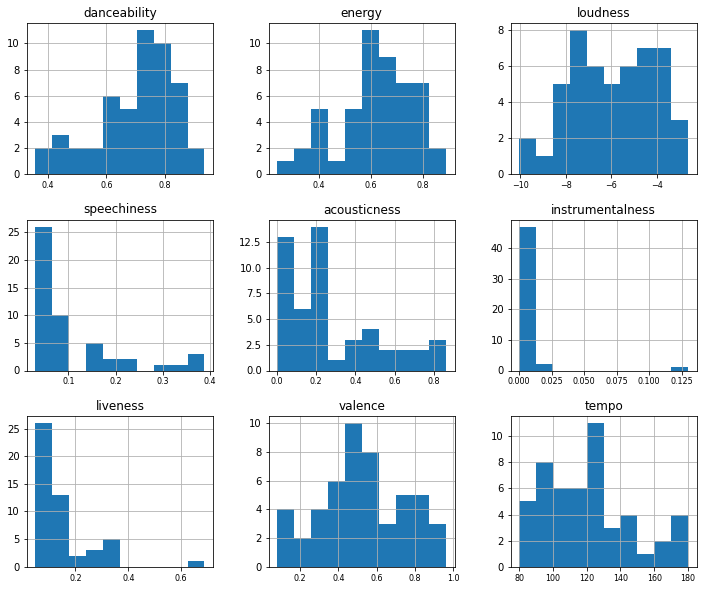

In [3]:
features_df.hist(xlabelsize=8, figsize=(12,10))

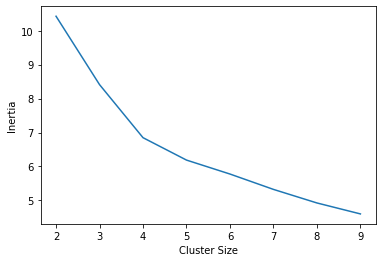

In [4]:
from sklearn.cluster import KMeans

# Scaling
for col in ['loudness', 'tempo']:
    features_df[col] = ((features_df[col] - features_df[col].min()) / (features_df[col].max() - features_df[col].min()))

# Determining the cluster size
score_list = []
for i in range(2,10):
    kmeans_model = KMeans(n_clusters=i, random_state=3).fit(features_df)
    preds = kmeans_model.predict(features_df)
    score_list.append(kmeans_model.inertia_)

# Visualization of different cluster size performations
pd.DataFrame(score_list, index=range(2, 10)).plot(legend=False).set(xlabel="Cluster Size", ylabel="Inertia")

# Training and Predicting
kmeans_model = KMeans(n_clusters=5, random_state=3).fit(features_df)
preds = kmeans_model.predict(features_df)

In [5]:
# Extracting song and artist names
songs = [x['track']['name'] for x in tracks['items']]
artists = [x['track']['artists'] for x in tracks['items']]

# Concatenating multiple artist names
artist_list = []
for group in artists:
    artist_group = []
    for person in group:
        artist_group.append(person['name'])
    artist_list.append(', '.join(artist_group))

# Adding predictions to dataframe
features_df['cluster'] = preds

# Grouping clusters to see the averages
clusters = features_df \
    .groupby('cluster') \
    .agg('mean')

In [6]:
clusters

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
cluster,,,,,,,,,
0,0.507375,0.447000,0.382821,0.058625,0.702625,0.000225,0.235387,0.288200,0.250832
1,0.796286,0.691429,0.832327,0.151757,0.240529,0.000075,0.117614,0.738286,0.819550
2,0.720500,0.751786,0.784686,0.081593,0.107745,0.001910,0.161764,0.664643,0.266140
3,0.757900,0.557800,0.332118,0.148890,0.374700,0.014941,0.124860,0.432600,0.191888
4,0.705455,0.577455,0.421666,0.116927,0.133187,0.000011,0.125291,0.469364,0.575458


In [7]:
fig = px.line_polar( r=clusters.loc[0].values,
                    theta=clusters.columns,
                    line_close=True,
                    range_r = [0,1.0],
                    title = "0 : acousticness")
fig.update_traces(fill='toself')
fig.show()

In [8]:
fig = px.line_polar( r=clusters.loc[1].values,
                    theta=clusters.columns,
                    line_close=True,
                    range_r = [0,1.0],
                    title = "1 : danceability")
fig.update_traces(fill='toself')
fig.show()

In [9]:
fig = px.line_polar( r=clusters.loc[2].values,
                    theta=clusters.columns,
                    line_close=True,
                    range_r = [0,1.0],
                    title = "2 : Energy")
fig.update_traces(fill='toself')
fig.show()

In [10]:
fig = px.line_polar( r=clusters.loc[3].values,
                    theta=clusters.columns,
                    line_close=True,
                    range_r = [0,1.0],
                    title = "3 : acousticness")
fig.update_traces(fill='toself')
fig.show()

In [11]:
fig = px.line_polar( r=clusters.loc[4].values,
                    theta=clusters.columns,
                    line_close=True,
                    range_r = [0,1.0],
                    title = "4 : cluster paling dinamis")
fig.update_traces(fill='toself')
fig.show()